# IRIS-HEP CMS Integration Challenge: Workflow Demonstration

This notebook demonstrates the workflow of the IRIS-HEP CMS integration challenge. The workflow is modular and consists of the following steps:

1. Environment Setup
2. Configuration Construction
3. Metadata Extraction
4. Skimming
5. Histogramming
6. Statistical Analysis
7. Plotting
8. Full Workflow

Each step will be demonstrated with code snippets and outputs to provide a clear understanding of how the codebase works.

## 1. Environment Setup

To set up the environment, use the following command to launch JupyterLab with the required dependencies:

```sh
pixi run lab
```

Alternatively, if you prefer a Conda-like environment, activate it using the provided script:

```sh
source pixi_activate.sh
```

## 2. Configuration Construction

Before running any step of the workflow, it is important to understand how the configuration is constructed. The configuration file defines all the parameters for the analysis, including paths, settings, and options for each step.

### Configuration Overview

The CMS analysis framework organizes configuration into logical sections that control different aspects of the workflow:

**Analysis Configuration Sections:**
- 🔧 **General**: Luminosity (59.8 fb⁻¹), analysis type, workflow step toggles
- 📊 **Datasets**: MC samples (DY+jets, QCD, ttbar), data runs, cross-sections  
- 🔍 **Channels**: Analysis channels (e.g., CMS_WORKSHOP with Z' → tt̄ selection)
- ✂️ **Selection**: Baseline event filters and object quality cuts (applied globally)
- 📈 **Observables**: Physics variables to measure (mtt, pT distributions, etc.)
  - **Ghost Observables**: Variables computed but not histogrammed (inputs for template observables)
- 🔧 **Corrections**: Correctionlib-based corrections and their associated uncertainties
- 🔀 **Systematics**: Other uncertainty sources not tied to correctionlib corrections
- 📊 **Statistics**: Cabinetry integration for statistical fits and uncertainties

**Important Distinctions:**
- **Selection** vs **Channel Selection**: Baseline cuts apply to all channels; individual channels can add their own selection criteria
- **Corrections** vs **Systematics**: Corrections apply correctionlib adjustments plus their built-in uncertainties; systematics handle other uncertainty sources (scale variations, PDF uncertainties, etc.)
- **Ghost Observables**: Computed alongside regular observables but excluded from histogramming (used as inputs to build template observables)

**Key Features:**
- **Type-safe validation** via Pydantic schemas prevents configuration errors
- **CLI overrides** allow parameter changes without editing config files  
- **Modular design** enables easy addition of new channels and observables

### Example:
Below is an example of how the configuration is loaded and modified programmatically.

In [1]:
# Import Rich-based Configuration Display from logging module
from utils.logging import display_config_table, get_config_logger

# Create a global config logger instance for this notebook
config_logger = get_config_logger()

In [2]:
# Example: Demonstrate configuration comparison and change detection
from user.configuration import config as original_config
from utils.schema import Config, load_config_with_restricted_cli

import copy

# Save the original configuration for comparison
config = copy.deepcopy(original_config)

print("=== Full configuration ===")
display_config_table(config, expand=True)

=== Full configuration ===


                                                 Configuration: GENERAL                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                          ┃ Value                                                                             
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ lumi                         │ 16400                                                                             
│ weight_branch                │ 'genWeight'                                                                       
│ analysis                     │ 'nondiff'                                                                         
│ run_skimming                 │ False                                                                             
│ run_histogramming            │ True                                                                              
│ run_statistics               │ True                                                                              
│ run_systematics              │ True                                                                              
│ run_plots_only               │ False                                                                             
│ run_mva_training             │ False                                                                             
│ run_metadata_generation      │ False                                                                             
│ read_from_cache              │ True                                                                              
│ output_dir                   │ 'example/outputs/'                                                                
│ lumifile                     │ './corrections/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt'         
│ cache_dir                    │ '/tmp/integration/'                                                               
└──────────────────────────────┴───────────────────────────────────────────────────────────────────────────────────

                                               Configuration: PREPROCESS                                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                           ┃ Value                                                                            
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ branches                      │ {                                                                                
│                               │   Muon:                                                                          
│                               │ [                                                                                
│                               │     [0]: 'pt'                                                                    
│                               │     [1]: 'eta'                                                                   
│                               │     [2]: 'phi'                                                                   
│                               │     [3]: 'mass'                                                                  
│                               │     [4]: 'miniIsoId'                                                             
│                               │     [5]: 'tightId'                                                               
│                               │     [6]: 'charge'                                                                
│                               │   ]                                                                              
│                               │   FatJet: ['particleNet_TvsQCD', 'pt', 'eta', 'phi', 'mass']                     
│                               │   Jet:                                                                           
│                               │ [                                                                                
│                               │     [0]: 'btagDeepB'                                                             
│                               │     [1]: 'jetId'                                                                 
│                               │     [2]: 'pt'                                                                    
│                               │     [3]: 'eta'                                                                   
│                               │     [4]: 'phi'                                                                   
│                               │     [5]: 'mass'                                                                  
│                               │   ]                                                                              
│                               │   PuppiMET: ['pt', 'phi']                                                        
│                               │   HLT: ['TkMu50']                                                                
│                               │   Pileup: ['nTrueInt']                                                           
│                               │   event: ['genWeight', 'run', 'luminosityBlock', 'event']                        
│                               │ }                                                                                
│ ignore_missing                │ False                                                                            
│ mc_branches                   │ {                                                                                
│                               │   event: ['genWeight']                                                           
│                               │   Pileup: ['nTrueInt']                                                           
│                               │ }                     

                                           Configuration: BASELINE_SELECTION                                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ function                          │ Function: Zprime_hardcuts_no_fj                                              
│ use                               │ [('Muon', None), ('Jet', None)]                                              
└───────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────

                                            Configuration: GOOD_OBJECT_MASKS                                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ analysis                          │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Muon'                                                           
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Muon', None)]                                                    
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Jet'                                                            
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Jet', None)]                                                     
│                                   │   }                                                                          
│                                   │   [2]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'FatJet'                                                         
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('FatJet', None)]                                                  
│                                   │   }                                                                          
│                                   │ ]                                                                            
│ mva                               │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Muon'                                                           
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Muon', None)]                                                    
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'FatJet'                                                         
│                                   │     function: Func

                                                Configuration: CHANNELS                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                     ┃ Value                                                                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ Items                   │ [                                                                                      
│                         │   [0]:                                                                                 
│                         │ {                                                                                      
│                         │     name: 'CMS_WORKSHOP'                                                               
│                         │     fit_observable: 'workshop_mtt'                                                     
│                         │     observables:                                                                       
│                         │ [                                                                                      
│                         │       [0]:                                                                             
│                         │ {                                                                                      
│                         │         name: 'workshop_mtt'                                                           
│                         │         binning: '200,3000,20'                                                         
│                         │         label: '$M(t\bar{t})$ [GeV]'                                                   
│                         │         function: Function: get_mtt                                                    
│                         │         use: [('Muon', None), ('Jet', None), ('FatJet', None), ('PuppiMET', None)]     
│                         │       }                                                                                
│                         │     ]                                                                                  
│                         │     selection:                                                                         
│                         │ {                                                                                      
│                         │       function: Function: Zprime_workshop_cuts                                         
│                         │       use: [('Muon', None), ('Jet', None), ('FatJet', None), ('PuppiMET', None)]       
│                         │     }                                                                                  
│                         │   }                                                                                    
│                         │ ]                                                                                      
└─────────────────────────┴────────────────────────────────────────────────────────────────────────────────────────

                                            Configuration: GHOST_OBSERVABLES                                       
┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                  ┃ Value                                                                                     
┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ Items                │ [                                                                                         
│                      │   [0]:                                                                                    
│                      │ {                                                                                         
│                      │     names: ('n_jet', 'leading_jet_mass', 'subleading_jet_mass', 'st',                     
│                      │ 'leading_jet_btag_score', 'subleading_jet_btag_score', 'S_zz', 'deltaR', 'pt_rel',        
│                      │ 'deltaR_times_pt')                                                                        
│                      │     collections: 'mva'                                                                    
│                      │     function: Function: get_mva_vars                                                      
│                      │     use: [('Muon', None), ('Jet', None)]                                                  
│                      │   }                                                                                       
│                      │ ]                                                                                         
└──────────────────────┴───────────────────────────────────────────────────────────────────────────────────────────

                                               Configuration: CORRECTIONS                                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ Items                             │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'pu_weight'                                                        
│                                   │     file: 'corrections/puWeights.json.gz'                                    
│                                   │     type: 'event'                                                            
│                                   │     use: [('Pileup', 'nTrueInt')]                                            
│                                   │     op: 'mult'                                                               
│                                   │     key: 'Collisions16_UltraLegacy_goldenJSON'                               
│                                   │     use_correctionlib: True                                                  
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'muon_id_sf'                                                       
│                                   │     file: 'corrections/muon_Z.json.gz'                                       
│                                   │     use: [('Muon', 'eta'), ('Muon', 'pt')]                                   
│                                   │     transform: Function: <lambda>                                            
│                                   │     type: 'event'                                                            
│                                   │     key: 'NUM_TightID_DEN_TrackerMuons'                                      
│                                   │     use_correctionlib: True                                                  
│                                   │     op: 'mult'                                                               
│                                   │     up_and_down_idx: ['systup', 'systdown']                                  
│                                   │   }                                                                          
│                                   │ ]                                                                            
└───────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────

                                               Configuration: SYSTEMATICS                                          
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ Items                             │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'jet_pt_resolution'                                                
│                                   │     up_function: Function: jet_pt_resolution                                 
│                                   │     target: ('Jet', 'pt')                                                    
│                                   │     use: [('Jet', 'pt')]                                                     
│                                   │     symmetrise: True                                                         
│                                   │     op: 'mult'                                                               
│                                   │     type: 'object'                                                           
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'jet_pt_scale'                                                     
│                                   │     up_function: Function: jet_pt_scale                                      
│                                   │     target: ('Jet', 'pt')                                                    
│                                   │     symmetrise: True                                                         
│                                   │     op: 'mult'                                                               
│                                   │     type: 'object'                                                           
│                                   │   }                                                                          
│                                   │ ]                                                                            
└───────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────

                                               Configuration: STATISTICS                                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ cabinetry_config                  │ 'example/outputs/cabinetry/cabinetry_config.yaml'                            
└───────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────

                                                Configuration: PLOTTING                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                              ┃ Value                                                                         
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ process_colors                   │ {                                                                             
│                                  │   ttbar_semilep: '#907AD6'                                                    
│                                  │   signal: '#DABFFF'                                                           
│                                  │   ttbar_lep: '#7FDEFF'                                                        
│                                  │   ttbar_had: '#2C2A4A'                                                        
│                                  │   wjets: '#72A1E5'                                                            
│                                  │   ttbar: '#907AD6'                                                            
│                                  │ }                                                                             
│ process_labels                   │ {                                                                             
│                                  │   ttbar_semilep: '$t\bar{t}\,\textrm{(lepton+jets)}$'                         
│                                  │   signal: '$Z^{\prime} \rightarrow t\bar{t}$'                                 
│                                  │   ttbar_lep: '$t\bar{t}\,\textrm{(leptonic)}$'                                
│                                  │   ttbar_had: '$t\bar{t}\,\textrm{(hadronic)}$'                                
│                                  │   wjets: '$W+\textrm{jets}$'                                                  
│                                  │   ttbar: '$t\bar{t}$'                                                         
│                                  │ }                                                                             
│ process_order                    │ [                                                                             
│                                  │   [0]: 'ttbar'                                                                
│                                  │   [1]: 'ttbar_had'                                                            
│                                  │   [2]: 'ttbar_lep'                                                            
│                                  │   [3]: 'ttbar_semilep'                                                        
│                                  │   [4]: 'wjets'                                                                
│                                  │   [5]: 'signal'                                                               
│                                  │ ]                                                                             
└──────────────────────────────────┴───────────────────────────────────────────────────────────────────────────────

                                                Configuration: DATASETS                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ datasets                          │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'signal'                                                           
│                                   │     directory: 'example/datasets/signal/m2000_w20/'                          
│                                   │     cross_section: 1.0                                                       
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_semilep'                                                    
│                                   │     directory: 'example/datasets/ttbar_semilep/'                             
│                                   │     cross_section: 364.31088                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [2]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_had'                                                        
│                                   │     directory: 'example/datasets/ttbar_had/'                                 
│                                   │     cross_section: 380.11432                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [3]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_l

In [3]:
# Let's look at the datasets config
display_config_table({"datasets": config["datasets"]},
                    expand=True)

# Make a modification
config["datasets"]["max_files"] = 10  # Limit to 10 files per dataset

print("=== SHOW ONLY CHANGES ===")
display_config_table({"datasets": config["datasets"]},
                    expand=True,
                    compare_with={"datasets": original_config["datasets"]},
                    show_only_changes=True)

# Step 2: Simulate CLI args processing (usually from sys.argv[1:])
cli_args = []  # No CLI overrides for this demo
full_config = load_config_with_restricted_cli(config, cli_args)

print("✅ Processed CLI arguments and loaded full configuration")
validated_config = Config(**full_config)  # This is the key validation step!

                                                Configuration: DATASETS                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ datasets                          │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'signal'                                                           
│                                   │     directory: 'example/datasets/signal/m2000_w20/'                          
│                                   │     cross_section: 1.0                                                       
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_semilep'                                                    
│                                   │     directory: 'example/datasets/ttbar_semilep/'                             
│                                   │     cross_section: 364.31088                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [2]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_had'                                                        
│                                   │     directory: 'example/datasets/ttbar_had/'                                 
│                                   │     cross_section: 380.11432                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [3]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_l

=== SHOW ONLY CHANGES ===


                                          Configuration: DATASETS (1 changes)                                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━
┃ Key                        ┃ Value                                                               ┃      Status   
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━
│ max_files                  │ 10                                                                  │      CHANGED  
└────────────────────────────┴─────────────────────────────────────────────────────────────────────┴───────────────

✅ Processed CLI arguments and loaded full configuration


# 3. Output Manager & Directory Structure

The framework uses a centralized `OutputDirectoryManager` (`utils/output_manager.py`) to organize all analysis outputs. This ensures consistent file organization and makes it easy to locate results.

In [4]:
from utils.output_manager import OutputDirectoryManager

output_manager = OutputDirectoryManager(
    root_output_dir=validated_config.general.output_dir,
    cache_dir=validated_config.general.cache_dir,
    metadata_dir=validated_config.general.metadata_dir,
    skimmed_dir=validated_config.general.skimmed_dir
)

print("✅ Created OutputDirectoryManager with validated paths")


✅ Created OutputDirectoryManager with validated paths


## 4. Metadata Extraction

The metadata extraction step scans NanoAOD datasets to collect essential information needed for analysis. This includes file inventories, event counts, and dataset metadata.

**Backend Process** (`utils/metadata_extractor.py`):
- **File Discovery**: Uses `ConfigurableDatasetManager` to locate dataset files
- **Coffea Integration**: Leverages Coffea's `preprocess()` function for efficient file scanning
- **Workitem Generation**: Creates processing units for parallel execution
- **Caching**: Stores metadata as JSON files for faster subsequent runs

**Key Outputs:**
- `fileset.json`: Complete file inventory with paths and metadata
- `workitems.json`: Processing units for distributed execution  
- `nanoaods.json`: Summary of available NanoAOD information

In [5]:
from utils.metadata_extractor import NanoAODMetadataGenerator
from utils.datasets import ConfigurableDatasetManager

# Step 1: Create dataset manager instance
dataset_manager = ConfigurableDatasetManager(validated_config.datasets)

# Step 2: Create metadata generator instance
metadata_generator = NanoAODMetadataGenerator(
    dataset_manager=dataset_manager,
    output_manager=output_manager
)
# In the back this uses coffea's preprocess function
metadata = metadata_generator.run()

Output()

# 5. Skimming & Event Selection

The skimming step processes workitems to apply event selection and reduce dataset size. This creates smaller, focused datasets containing only events of interest for the analysis.

**Backend Implementation** (`utils/skimming.py`):
- **Dask Integration**: Uses Dask-Awkward for distributed processing in a coffea-processor-like setup (see [Alex's issue](https://github.com/scikit-hep/coffea/issues/1393))
- **Selection Functions**: Applies user-defined cuts from configuration
- **ROOT Output**: Saves skimmed events as ROOT files with preserved structure (to be changed)
- **Metadata Tracking**: Needed for book-keeping and normalization
- **Caching Support**: Automatically caches results into .pkl files to avoid reprocessing unchanged datasets

In [6]:
from utils.skimming import process_workitems_with_skimming

# Extract workitems and fileset from metadata generator
fileset = metadata_generator.fileset
workitems = metadata_generator.workitems

print(f"📊 Processing {len(workitems)} workitems across {len(fileset)} datasets")

# Disable caching for demonstration (set to True to use cached results)
validated_config.general.read_from_cache = False

# Process workitems with skimming - applies baseline selection cuts
processed_datasets = process_workitems_with_skimming(
    workitems,
    validated_config,
    output_manager,
    fileset,
    metadata_generator.nanoaods_summary
)

# Display the structure of processed datasets
print(f"\n✅ Skimming complete! Processed datasets structure x:")
for dataset_name, events_list in processed_datasets.items():
    print(f"  📁 {dataset_name} processed")
    for i, (events, metadata) in enumerate(events_list):
        print(f"    └── File {i+1}: {len(events)} events, {len(events.fields)} branches")

print(f"\n💾 Skimmed data saved to: {output_manager.get_skimmed_dir()}")

📊 Processing 611 workitems across 6 datasets

✅ Skimming complete! Processed datasets structure x:
  📁 data processed
    └── File 1: 592994 events, 8 branches
  📁 wjets__nominal processed
    └── File 1: 17595 events, 10 branches
  📁 ttbar_lep__nominal processed
    └── File 1: 848086 events, 10 branches
  📁 ttbar_had__nominal processed
    └── File 1: 15286 events, 10 branches
  📁 ttbar_semilep__nominal processed
    └── File 1: 545705 events, 10 branches
  📁 signal__nominal processed
    └── File 1: 100152 events, 10 branches

💾 Skimmed data saved to: /Users/moaly/Work/iris-hep/integration-challenge/cms/example/outputs/skimmed


In [7]:
# Demonstrate caching behavior - show how cache speeds up subsequent runs
print("🔄 Demonstrating caching effectiveness...")

# Show current cache status
print(f"📋 Current cache setting: {'ENABLED' if validated_config.general.read_from_cache else 'DISABLED'}")

# Enable caching to show how it speeds up subsequent runs
validated_config.general.read_from_cache = True

import time
print(f"\n⚡ Running with cache ENABLED...")
start_time = time.time()

# Run the same skimming operation - should be much faster due to caching
cached_datasets = process_workitems_with_skimming(
    workitems,
    validated_config,
    output_manager,
    fileset,
    metadata_generator.nanoaods_summary
)

end_time = time.time()

print(f"✅ Cached run completed in {end_time - start_time:.2f} seconds")

# Show cache directory contents
import os
cache_files = os.listdir(output_manager.get_skimmed_dir()) if os.path.exists(output_manager.get_skimmed_dir()) else []
print(f"💾 Cached files in skimmed directory: {len(cache_files)} files")
print(f"📁 Cache location: {output_manager.get_cache_dir()}")

🔄 Demonstrating caching effectiveness...
📋 Current cache setting: DISABLED

⚡ Running with cache ENABLED...
✅ Cached run completed in 0.20 seconds
💾 Cached files in skimmed directory: 7 files
📁 Cache location: /private/tmp/integration


# 6. Analysis & Histogramming

The analysis step processes skimmed events to compute observables and fill histograms. This is where the physics analysis happens, applying selections and calculating analysis variables.

**Backend Architecture** (`analysis/nondiff.py`):
- **Analysis Classes**: Modular analysis implementations -- allows for an alternative version of the analysis with same setup (e.g. differentiable)
- **Observable Computing**: Calculates physics quantities from event data
- **Histogram Management**: Uses `Hist` for histogram operations
- **Systematic Variations**: Computes systematic uncertainty variations as alternative histograms

In [8]:
# Import the analysis class for non-differential analysis
from analysis.nondiff import NonDiffAnalysis

# Initialize the analysis object with configuration, processed datasets, and output manager
# This analysis object will handle histogram creation, observable computation, and systematic variations
nondiff_analysis = NonDiffAnalysis(validated_config, processed_datasets, output_manager)

print(f"🔬 Analysis initialized for {len(nondiff_analysis.processed_datasets)} datasets")

# Loop over each dataset and its associated event data
for dataset_name, events_list in nondiff_analysis.processed_datasets.items():
    print(f"📊 Processing dataset: {dataset_name}")

    # Each dataset contains a list of (events, metadata) tuples
    # In most cases, this will be a single tuple per dataset after event merging
    if validated_config.general.run_histogramming:
        for events, metadata in events_list:
            print(f"   • Processing {len(events)} events with metadata: {metadata['process']}")

            # Process the events through the analysis pipeline:
            # - Apply channel-specific selections
            # - Compute observables (physics variables like mtt, pT, etc.)
            # - Fill histograms for each channel and systematic variation
            # - Apply corrections and systematic uncertainties
            nondiff_analysis.process(events, metadata)
    else:
        print(f"   • Histogramming disabled - skipping {dataset_name}")

print(f"\n✅ Histogramming complete! Results saved to: {output_manager.get_histograms_dir()}")
print(f"📈 Generated histograms for channels: {[ch.name for ch in validated_config.channels]}")

🔬 Analysis initialized for 6 datasets
📊 Processing dataset: data
   • Processing 592994 events with metadata: data


NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation nominal
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation jet_pt_resolution_up
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation jet_pt_resolution_down
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation jet_pt_scale_up
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation jet_pt_scale_down
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation pu_weight_up
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation pu_weight_down
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation muon_id_sf_up
NonDiffAnalysis:: No events left in CMS_WORKSHOP for wjets with variation muon_id_sf_down


📊 Processing dataset: wjets__nominal
   • Processing 17595 events with metadata: wjets
📊 Processing dataset: ttbar_lep__nominal
   • Processing 848086 events with metadata: ttbar_lep
📊 Processing dataset: ttbar_had__nominal
   • Processing 15286 events with metadata: ttbar_had
📊 Processing dataset: ttbar_semilep__nominal
   • Processing 545705 events with metadata: ttbar_semilep
📊 Processing dataset: signal__nominal
   • Processing 100152 events with metadata: signal

✅ Histogramming complete! Results saved to: /Users/moaly/Work/iris-hep/integration-challenge/cms/example/outputs/histograms
📈 Generated histograms for channels: ['CMS_WORKSHOP']


# 7. Statistical Analysis

The statistical analysis step performs fits and extracts physics results from the histograms. This uses the `cabinetry` for statistical modeling and fitting.

**Backend Integration** (`analysis/nondiff.py` + `cabinetry`):
- **Cabinetry Integration**: Incomplete, currently expects a pre-made `cabinetry` config
- **Workspace Creation**: Builds `pyhf` workspace
- **Profile Likelihood**: Performs maximum likelihood fits
- **Visualization**: Currently relying on `cabinetry`'s defaults, but will be made more flexible

CMS_WORKSHOP_wjets has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_MU_ID_SF_Up has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_MU_ID_SF_Down has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_PU_weight_Up has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_PU_weight_Down has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_MU_ID_SF_Up has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_MU_ID_SF_Down has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_PU_weight_Up has empty bins: [0 1 6 7 8 9]
CMS_WORKSHOP_wjets_PU_weight_Down has empty bins: [0 1 6 7 8 9]


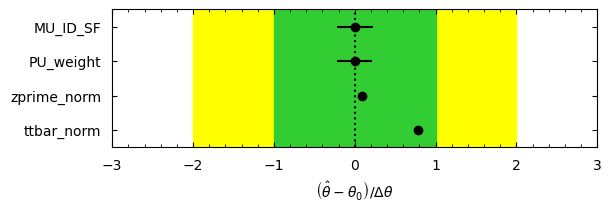

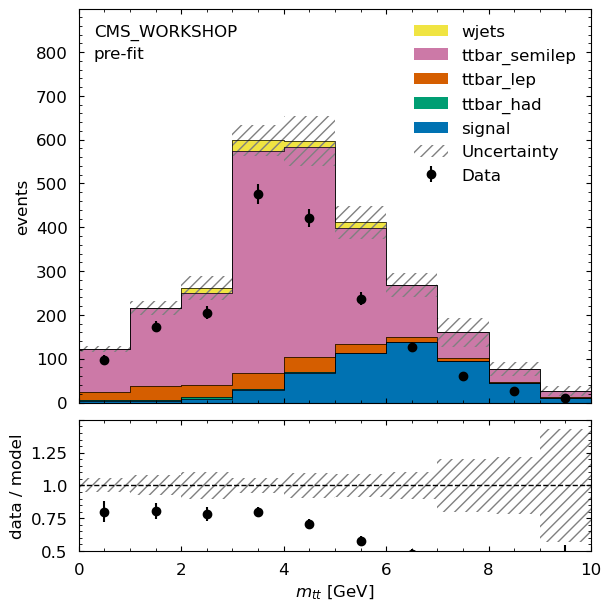

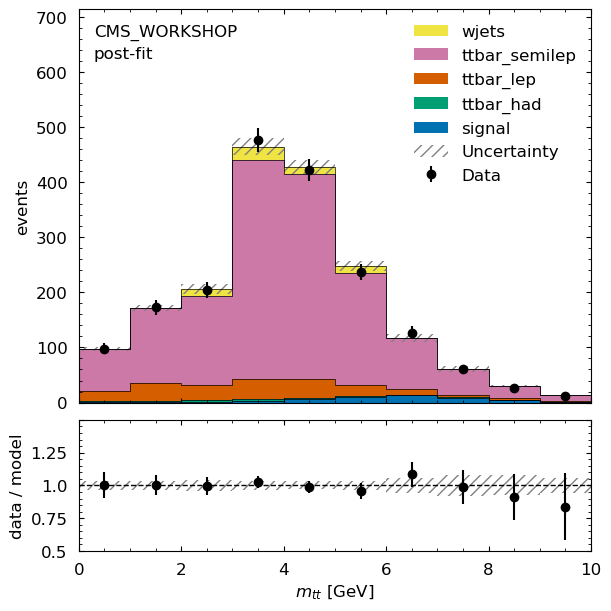

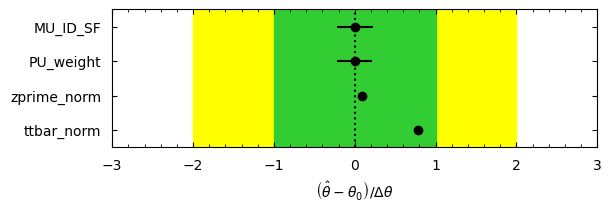

In [9]:
import cabinetry
cabinetry_config = cabinetry.configuration.load(
    validated_config.statistics.cabinetry_config
)
data, fit_results, pre_fit_predictions, postfit_predictions = (
    nondiff_analysis.run_fit(cabinetry_config=cabinetry_config)
)
cabinetry.visualize.data_mc(
    pre_fit_predictions,
    data,
    close_figure=False,
    config=cabinetry_config,
    figure_folder=nondiff_analysis.output_manager.get_statistics_dir(),

)
cabinetry.visualize.data_mc(
    postfit_predictions,
    data,
    close_figure=False,
    config=cabinetry_config,
    figure_folder=nondiff_analysis.output_manager.get_statistics_dir(),
)
cabinetry.visualize.pulls(fit_results, close_figure=False, figure_folder=nondiff_analysis.output_manager.get_statistics_dir(),)

## 8. Full Workflow

The complete analysis can be executed with a single command that orchestrates all steps from a steering script. The `analysis.py` script in repository provides the main entry point and handles the workflow coordination.

**Workflow steering** (`analysis.py`):
- **Step Coordination**
- **Error Handling**
- **CLI Interface**

### Command:
```sh
python analysis.py
```

---

## Appendix: Detailed Configuration Reference

The following sections provide detailed information about each configuration section for reference.

### General Configuration

The **General Configuration** section contains the core settings that control the overall behavior of the analysis workflow.

**Key Parameters:**
- `lumi`: Integrated luminosity for the analysis (pb⁻¹)
- `weight_branch`: Branch name for event weights (usually "genWeight")
- `analysis`: Type of analysis ("diff" or "nondiff")
- `run_*`: Boolean flags to enable/disable specific workflow steps
- `output_dir`: Directory where all output files will be saved
- `cache_dir`: Directory for temporary/cached files
- `lumifile`: JSON file containing good runs/luminosity sections

In [10]:
# Display General Configuration
print("=== GENERAL CONFIGURATION ===")
display_config_table({"general": config["general"]}, expand=True)

=== GENERAL CONFIGURATION ===


                                                 Configuration: GENERAL                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                          ┃ Value                                                                             
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ lumi                         │ 16400                                                                             
│ weight_branch                │ 'genWeight'                                                                       
│ analysis                     │ 'nondiff'                                                                         
│ run_skimming                 │ False                                                                             
│ run_histogramming            │ True                                                                              
│ run_statistics               │ True                                                                              
│ run_systematics              │ True                                                                              
│ run_plots_only               │ False                                                                             
│ run_mva_training             │ False                                                                             
│ run_metadata_generation      │ False                                                                             
│ read_from_cache              │ True                                                                              
│ output_dir                   │ 'example/outputs/'                                                                
│ lumifile                     │ './corrections/Cert_271036-284044_13TeV_Legacy2016_Collisions16_JSON.txt'         
│ cache_dir                    │ '/tmp/integration/'                                                               
└──────────────────────────────┴───────────────────────────────────────────────────────────────────────────────────

### Dataset Configuration

The **Dataset Configuration** section defines which datasets will be processed in the analysis.

**Key Parameters:**
- `datasets`: List of dataset definitions with paths, cross-sections, and metadata
- `max_files`: Optional limit on number of files per dataset (useful for testing)

In [11]:
# Display Dataset Configuration
if "datasets" in config:
    display_config_table({"datasets": config["datasets"]}, expand=True)

                                                Configuration: DATASETS                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ datasets                          │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'signal'                                                           
│                                   │     directory: 'example/datasets/signal/m2000_w20/'                          
│                                   │     cross_section: 1.0                                                       
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_semilep'                                                    
│                                   │     directory: 'example/datasets/ttbar_semilep/'                             
│                                   │     cross_section: 364.31088                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [2]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_had'                                                        
│                                   │     directory: 'example/datasets/ttbar_had/'                                 
│                                   │     cross_section: 380.11432                                                 
│                                   │     file_pattern: '*.txt'                                                    
│                                   │     tree_name: 'Events'                                                      
│                                   │     weight_branch: 'genWeight'                                               
│                                   │   }                                                                          
│                                   │   [3]:                                                                       
│                                   │ {                                                                            
│                                   │     name: 'ttbar_l

### Analysis Channels Configuration

Analysis channels define the different physics signatures and final states to be analyzed.

**Key Parameters:**
- `channels`: List of analysis channels with specific selections and observables
- Each channel can have different selection requirements and target variables

In [12]:
# Display Analysis Channels Configuration
if "channels" in config:
    channels_dict = {}
    for i, channel in enumerate(config["channels"]):
        channel_name = channel.get("name", f"Channel_{i}")
        channels_dict[channel_name] = channel
    display_config_table({"channels": channels_dict}, expand=True)

                                                Configuration: CHANNELS                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                     ┃ Value                                                                                  
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ CMS_WORKSHOP            │ {                                                                                      
│                         │   name: 'CMS_WORKSHOP'                                                                 
│                         │   fit_observable: 'workshop_mtt'                                                       
│                         │   observables:                                                                         
│                         │ [                                                                                      
│                         │     [0]:                                                                               
│                         │ {                                                                                      
│                         │       name: 'workshop_mtt'                                                             
│                         │       binning: '200,3000,20'                                                           
│                         │       label: '$M(t\bar{t})$ [GeV]'                                                     
│                         │       function: Function: get_mtt                                                      
│                         │       use: [('Muon', None), ('Jet', None), ('FatJet', None), ('PuppiMET', None)]       
│                         │     }                                                                                  
│                         │   ]                                                                                    
│                         │   selection:                                                                           
│                         │ {                                                                                      
│                         │     function: Function: Zprime_workshop_cuts                                           
│                         │     use: [('Muon', None), ('Jet', None), ('FatJet', None), ('PuppiMET', None)]         
│                         │   }                                                                                    
│                         │ }                                                                                      
└─────────────────────────┴────────────────────────────────────────────────────────────────────────────────────────

### Additional Configuration Sections

The framework includes several other configuration sections for advanced features:

**Available Sections:**
- `preprocess`: Data preprocessing and branch selection settings
- `good_object_masks`: Object quality criteria and identification cuts
- `corrections`: Calibration factors and correction applications
- `systematics`: Systematic uncertainty definitions and variations
- `statistics`: Statistical analysis configuration (Cabinetry integration)
- `plotting`: Visualization settings, colors, and styling options

In [13]:
# Display additional configuration sections
additional_sections = ["preprocess", "good_object_masks", "statistics", "plotting"]

for section in additional_sections:
    if section in config:
        print(f"\n=== {section.upper()} ===")
        display_config_table({section: config[section]}, expand=True)


=== PREPROCESS ===


                                               Configuration: PREPROCESS                                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                           ┃ Value                                                                            
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ branches                      │ {                                                                                
│                               │   Muon:                                                                          
│                               │ [                                                                                
│                               │     [0]: 'pt'                                                                    
│                               │     [1]: 'eta'                                                                   
│                               │     [2]: 'phi'                                                                   
│                               │     [3]: 'mass'                                                                  
│                               │     [4]: 'miniIsoId'                                                             
│                               │     [5]: 'tightId'                                                               
│                               │     [6]: 'charge'                                                                
│                               │   ]                                                                              
│                               │   FatJet: ['particleNet_TvsQCD', 'pt', 'eta', 'phi', 'mass']                     
│                               │   Jet:                                                                           
│                               │ [                                                                                
│                               │     [0]: 'btagDeepB'                                                             
│                               │     [1]: 'jetId'                                                                 
│                               │     [2]: 'pt'                                                                    
│                               │     [3]: 'eta'                                                                   
│                               │     [4]: 'phi'                                                                   
│                               │     [5]: 'mass'                                                                  
│                               │   ]                                                                              
│                               │   PuppiMET: ['pt', 'phi']                                                        
│                               │   HLT: ['TkMu50']                                                                
│                               │   Pileup: ['nTrueInt']                                                           
│                               │   event: ['genWeight', 'run', 'luminosityBlock', 'event']                        
│                               │ }                                                                                
│ ignore_missing                │ False                                                                            
│ mc_branches                   │ {                                                                                
│                               │   event: ['genWeight']                                                           
│                               │   Pileup: ['nTrueInt']                                                           
│                               │ }                     


=== GOOD_OBJECT_MASKS ===


                                            Configuration: GOOD_OBJECT_MASKS                                       
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ analysis                          │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Muon'                                                           
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Muon', None)]                                                    
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Jet'                                                            
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Jet', None)]                                                     
│                                   │   }                                                                          
│                                   │   [2]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'FatJet'                                                         
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('FatJet', None)]                                                  
│                                   │   }                                                                          
│                                   │ ]                                                                            
│ mva                               │ [                                                                            
│                                   │   [0]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'Muon'                                                           
│                                   │     function: Function: <lambda>                                             
│                                   │     use: [('Muon', None)]                                                    
│                                   │   }                                                                          
│                                   │   [1]:                                                                       
│                                   │ {                                                                            
│                                   │     object: 'FatJet'                                                         
│                                   │     function: Func


=== STATISTICS ===


                                               Configuration: STATISTICS                                           
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                               ┃ Value                                                                        
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ cabinetry_config                  │ 'example/outputs/cabinetry/cabinetry_config.yaml'                            
└───────────────────────────────────┴──────────────────────────────────────────────────────────────────────────────


=== PLOTTING ===


                                                Configuration: PLOTTING                                            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
┃ Key                              ┃ Value                                                                         
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
│ process_colors                   │ {                                                                             
│                                  │   ttbar_semilep: '#907AD6'                                                    
│                                  │   signal: '#DABFFF'                                                           
│                                  │   ttbar_lep: '#7FDEFF'                                                        
│                                  │   ttbar_had: '#2C2A4A'                                                        
│                                  │   wjets: '#72A1E5'                                                            
│                                  │   ttbar: '#907AD6'                                                            
│                                  │ }                                                                             
│ process_labels                   │ {                                                                             
│                                  │   ttbar_semilep: '$t\bar{t}\,\textrm{(lepton+jets)}$'                         
│                                  │   signal: '$Z^{\prime} \rightarrow t\bar{t}$'                                 
│                                  │   ttbar_lep: '$t\bar{t}\,\textrm{(leptonic)}$'                                
│                                  │   ttbar_had: '$t\bar{t}\,\textrm{(hadronic)}$'                                
│                                  │   wjets: '$W+\textrm{jets}$'                                                  
│                                  │   ttbar: '$t\bar{t}$'                                                         
│                                  │ }                                                                             
│ process_order                    │ [                                                                             
│                                  │   [0]: 'ttbar'                                                                
│                                  │   [1]: 'ttbar_had'                                                            
│                                  │   [2]: 'ttbar_lep'                                                            
│                                  │   [3]: 'ttbar_semilep'                                                        
│                                  │   [4]: 'wjets'                                                                
│                                  │   [5]: 'signal'                                                               
│                                  │ ]                                                                             
└──────────────────────────────────┴───────────────────────────────────────────────────────────────────────────────